In [1]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
# 
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

### Область работы 1 (библиотеки)

In [2]:
# Данный блок в области 1 НЕ выполняется преподавателем
# 
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
#
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
#
# pip install

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, KFold, StratifiedShuffleSplit, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from tqdm import tqdm
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
import category_encoders as ce

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import Lars
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from IPython.display import Image

import category_encoders as ce
from sklearn.preprocessing import FunctionTransformer

from sklearn.model_selection import ShuffleSplit

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.preprocessing import OrdinalEncoder

### Область работы 2 (поиск  модели .... )

In [4]:
# Данный блок(и) НЕ выполняются преподавателем в области 2
# блок(и) предназначены для поиска лучшей модели 
# должен быть понятен и очевиден отбор параметров модели
# 
# Запрещается размещать данные блоки за пределами обасти 2
# Все блоки данной области должны быть выполнены
#
# ЗАПРЕЩАЕТСЯ ИСПОЛЬЗОВАТЬ ТЕСТОВАЙ НАБОР
#
# Путь к тренировочному набору
# 

path_train = 'train.csv'# содержит только имя файла, без имен папок !!!

In [5]:
df = pd.read_csv(path_train)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145179 entries, 0 to 145178
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   carat    145179 non-null  float64
 1   cut      145179 non-null  object 
 2   color    145179 non-null  object 
 3   clarity  145179 non-null  object 
 4   depth    145179 non-null  float64
 5   table    145179 non-null  float64
 6   x        145179 non-null  float64
 7   y        145179 non-null  float64
 8   z        145179 non-null  float64
 9   price    145179 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 11.1+ MB


In [7]:
df.describe()

,carat,depth,table,x,y,z,price
count,145179.000000,145179.000000,145179.000000,145179.000000,145179.000000,145179.000000,145179.000000
mean,0.791300,61.820854,57.229656,5.716450,5.721229,3.535055,3972.751996
std,0.463331,1.082079,1.920026,1.110629,1.103516,0.690620,4036.300085
min,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,948.000000
50%,0.700000,61.900000,57.000000,5.710000,5.720000,3.530000,2409.000000
75%,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,3.500000,71.600000,70.000000,9.650000,10.010000,31.300000,18818.000000


In [8]:
# отбор всех сторок с нулевым. значением в любом месте колонки
df[df.eq(0).any(axis=1)]

,carat,cut,color,clarity,depth,table,x,y,z,price
28099,2.17,Premium,H,SI2,60.3,57.0,8.42,8.36,0.0,15923
44199,0.71,Very Good,F,SI2,62.0,60.0,0.00,6.71,0.0,2130
81538,2.20,Premium,I,SI2,60.1,60.0,8.45,8.41,0.0,11221
95099,0.71,Good,F,SI1,64.1,60.0,0.00,0.00,0.0,2130
110571,2.18,Premium,H,SI2,59.4,60.0,8.46,8.41,0.0,15842
127686,2.18,Premium,H,SI2,60.8,59.0,8.42,8.38,0.0,13938


In [9]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

<AxesSubplot: >

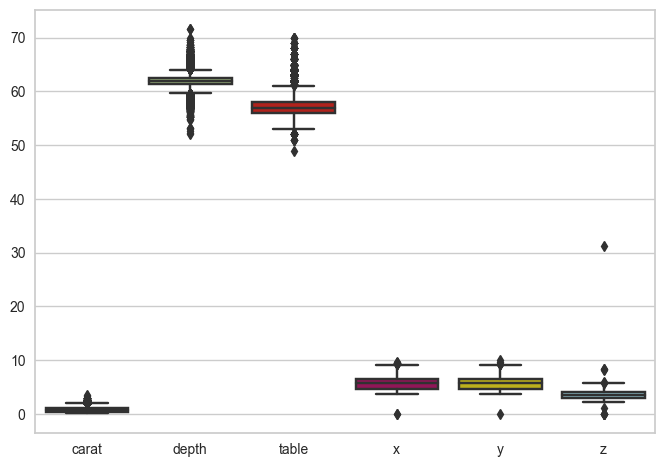

In [55]:
sns.boxplot(data = df.drop(['price'],axis=1))

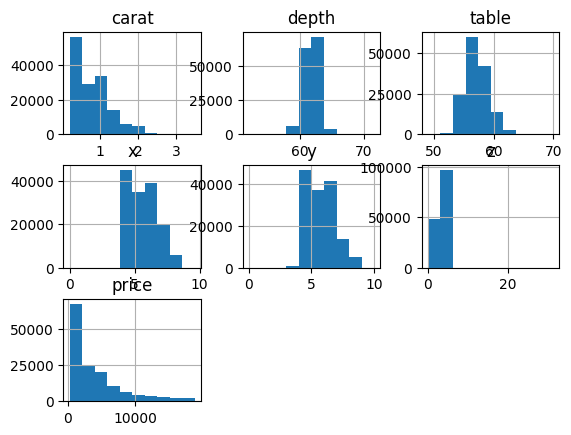

In [12]:
df.hist();

<AxesSubplot: >

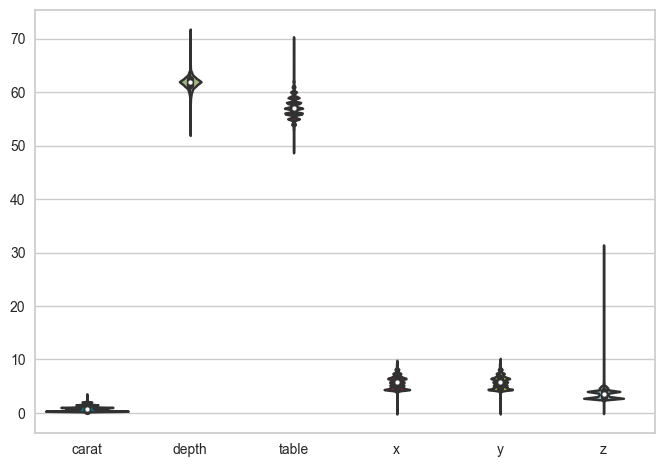

In [56]:
sns.violinplot(data = df.drop(['price'],axis=1))

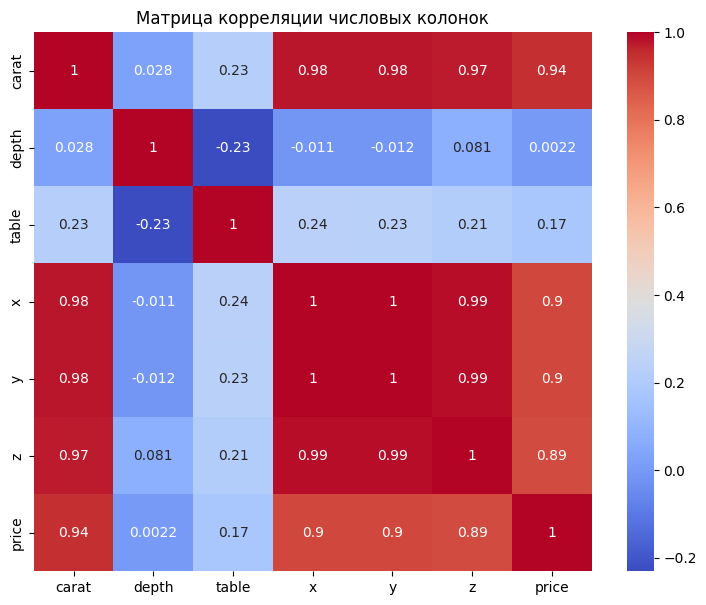

In [14]:
corr_matrix = df.corr()
plt.figure(figsize=(9, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# добавляем заголовок
plt.title('Матрица корреляции числовых колонок')

# отображаем график
plt.show()

### Начинаем самое интересное

In [15]:
X = df.drop(['price'],axis=1)
y = df['price']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, train_size = 0.05)

In [27]:
X_train

,carat,cut,color,clarity,depth,table,x,y,z
87858,0.51,Ideal,F,VS1,61.8,54.0,5.10,5.15,3.17
140320,0.40,Ideal,G,VS2,61.5,54.0,4.77,4.83,2.95
141306,0.54,Ideal,F,SI1,62.1,57.0,5.17,5.22,3.23
25761,1.20,Ideal,F,VS2,59.8,57.0,6.91,6.86,4.13
28549,0.76,Very Good,F,VS2,59.0,57.0,5.92,5.96,3.52
...,...,...,...,...,...,...,...,...,...
110268,0.30,Good,E,SI1,63.3,60.0,4.30,4.32,2.73
119879,1.07,Ideal,H,SI1,62.2,57.0,6.52,6.59,4.07
103694,2.00,Good,J,VS2,63.6,58.0,7.88,7.91,5.04
131932,0.53,Ideal,G,SI2,61.6,56.0,5.18,5.21,3.21


In [28]:
axis_features = ['x','y','z', 'carat','depth','table']
categorical_features = ['cut','color','clarity']

imputer_for_nums = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors = 5, missing_values=np.nan)),
    ('scaler', MinMaxScaler())
])

imputer_for_categorical_OHE = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),   
    ('scaler', OneHotEncoder())
    
])

imputer_for_categorical_ordinal = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler', OrdinalEncoder())
    
])

order_for_cat = [{
    'col':'НАЗВАНИЕ КОЛОНКИ',
    'mapping':{'J':0, 'I':1, 'H':2, 'G':3, 'F':4, 'E':5, 'D':6}
    }]

imputer_for_categorical_with_order = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ce',ce.OrdinalEncoder(mapping=order_for_cat)),
    ('scaler', MinMaxScaler())
    ])




    
CT = ColumnTransformer([
    
        ("nums", for_nums, axis_features), # 
        ("categorical_OHE", for_categorical_OHE, categorical_features), ## страны и тд
#         ("categorical_ordinal", for_categorical_ordinal, ["Пол_человека"]), # бинарные
#         ("categorical_with_order", for_categorical_with_order, ["Цвет бриллианта"]) # приоритизация 0,1,2

             ], 
    
    
        remainder = 'passthrough')

display(CT)

res_ct = CT.fit_transform(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer_for_nums',
                                 Pipeline(steps=[('imputer', KNNImputer()),
                                                 ('scaler', MinMaxScaler())]),
                                 ['x', 'y', 'z', 'carat', 'depth', 'table']),
                                ('imputer_for_categorical_OHE',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('scaler', OneHotEncoder())]),
                                 ['cut', 'color', 'clarity'])])

In [57]:
X_train_new = pd.DataFrame(res_ct)


X_train_new.T

,0,1,2,3,4,5,6,7,8,9,...,7248,7249,7250,7251,7252,7253,7254,7255,7256,7257
0,0.238351,0.179211,0.250896,0.562724,0.385305,0.603943,0.634409,0.109319,0.155914,0.098566,...,0.498208,0.218638,0.231183,0.347670,0.109319,0.094982,0.492832,0.736559,0.252688,0.179211
1,0.256272,0.198925,0.268817,0.562724,0.401434,0.594982,0.650538,0.112903,0.170251,0.111111,...,0.521505,0.232975,0.245520,0.365591,0.111111,0.107527,0.514337,0.750896,0.267025,0.191756
2,0.260479,0.194611,0.278443,0.547904,0.365269,0.577844,0.682635,0.119760,0.101796,0.113772,...,0.497006,0.239521,0.275449,0.365269,0.125749,0.128743,0.529940,0.820359,0.272455,0.194611
3,0.131356,0.084746,0.144068,0.423729,0.237288,0.453390,0.559322,0.050847,0.050847,0.042373,...,0.347458,0.127119,0.127119,0.211864,0.050847,0.042373,0.368644,0.762712,0.139831,0.084746
4,0.477477,0.450450,0.504505,0.297297,0.225225,0.261261,0.549550,0.486486,0.126126,0.495495,...,0.315315,0.486486,0.630631,0.450450,0.531532,0.612613,0.513514,0.639640,0.459459,0.486486
5,0.187500,0.187500,0.375000,0.375000,0.375000,0.500000,0.312500,0.437500,0.562500,0.312500,...,0.312500,0.687500,0.312500,0.375000,0.250000,0.562500,0.375000,0.437500,0.312500,0.250000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
8,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import PredictionErrorDisplay

fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_predictions(
    np.square(y_test),
    y_pred=y_pred_1,
    kind="actual_vs_predicted",
    ax=axs[0],
)
axs[0].set_title("True vs. Predicted values")
PredictionErrorDisplay.from_predictions(
    np.square(y_test),
    y_pred=y_pred_1,
    kind="residual_vs_predicted",
    ax=axs[1],
)
axs[1].set_title("Residuals vs. Predicted Values")
fig.suptitle("Plotting cross-validated predictions")
plt.tight_layout()
plt.show();

In [49]:
pipe_1 = Pipeline([('preprocessing', CT),
                ('regression', RandomForestRegressor(n_estimators = 100))])
pipe_1.fit(X_train, y_train)
y_pred_1 = pipe_1.predict(X_test)

print("Train:",mean_squared_error(y_train, pipe_1.predict(X_train)))
print("Test:",mean_squared_error(y_test, y_pred_1))

print("Train:",mean_absolute_percentage_error(y_train, pipe_1.predict(X_train)))
print("Test:",mean_absolute_percentage_error(y_test, y_pred_1))

Train: 61258.05368191368
Test: 452137.8313490304
Train: 0.0335842145591249
Test: 0.09199931924764636


In [48]:
pipe_1 = Pipeline([('preprocessing', CT),
                ('regression', GradientBoostingRegressor(learning_rate = 0.1, subsample = 1, n_estimators = 100))])
pipe_1.fit(X_train, y_train)
y_pred_1 = pipe_1.predict(X_test)

print("Train:",mean_squared_error(y_train, pipe_1.predict(X_train)))
print("Test:",mean_squared_error(y_test, y_pred_1))

print("Train:",mean_absolute_percentage_error(y_train, pipe_1.predict(X_train)))
print("Test:",mean_absolute_percentage_error(y_test, y_pred_1))

Train: 417097.0759551422
Test: 492724.6924425432
Train: 0.11255904386275814
Test: 0.11614473584896662


## Проверяем пропуски на тестовых данных

In [ ]:
path_test = 'test.csv'

df_test = pd.read_csv(path_test)

In [ ]:
df_test

In [ ]:
df_test.hist(figsize=(9, 9));

In [ ]:
df_test

In [ ]:
sns.pairplot(data = df_test[['x','y','z']])